In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df=pd.read_csv('C:/Users/tanvi/Projects/Personal/Github/DiwaliSalesAnalysis/Diwali Sales Data.csv',encoding='unicode_escape')

In [5]:
df.shape

(11251, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [9]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(11239, 13)

In [13]:
df['Amount']=df['Amount'].astype('int')

In [14]:
df['Amount'].dtype

dtype('int32')

In [15]:
df[['Age','Orders','Amount']].describe

<bound method NDFrame.describe of        Age  Orders  Amount
0       28       1   23952
1       35       3   23934
2       35       3   23924
3       16       2   23912
4       28       2   23877
...    ...     ...     ...
11246   19       4     370
11247   33       3     367
11248   40       4     213
11249   37       3     206
11250   19       3     188

[11239 rows x 3 columns]>

In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## GENDER

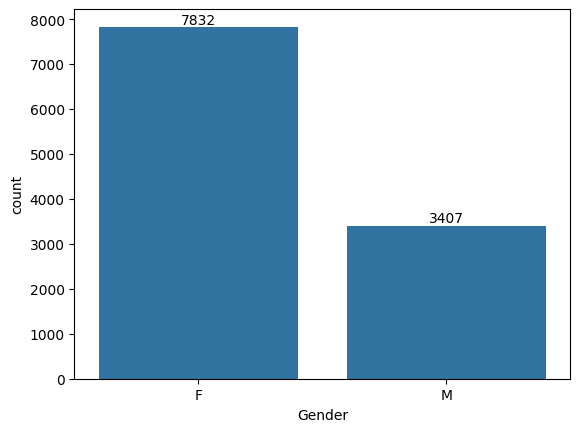

In [17]:
ax=sns.countplot(x='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)
    

In [18]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


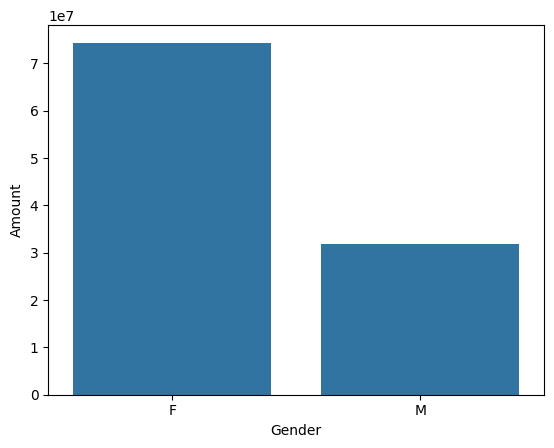

In [19]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

ax=sns.barplot(x='Gender',y='Amount',data=sales_gen)



*MOST OF THE BUYERS ARE FEAMLES AS SHOWN IN THE ABOVE GRAPH*

## AGE

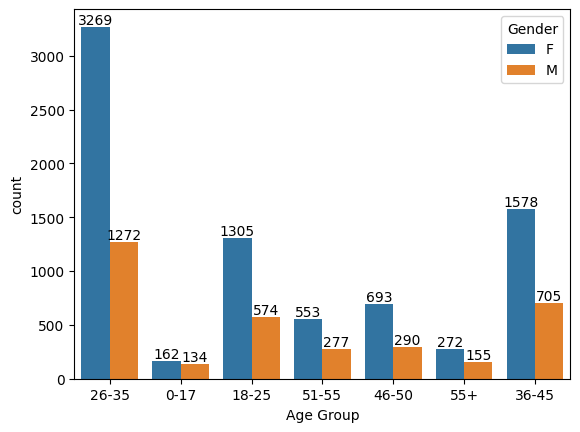

In [20]:

ax=sns.countplot(x='Age Group',data=df,hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)


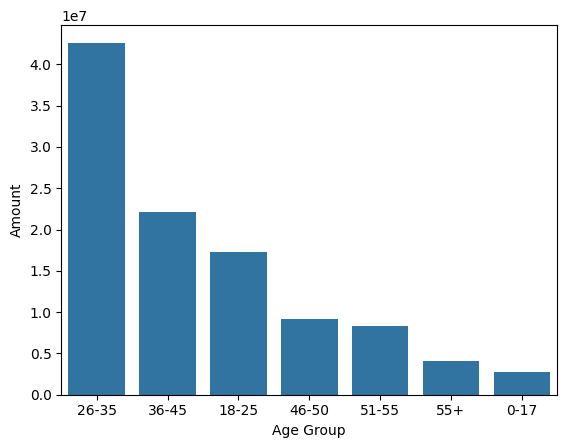

In [21]:
sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

ax=sns.barplot(x='Age Group',y='Amount',data=sales_age)



*From above graphs, we can see most of the buyers are of age group between 26-35 years female*

## STATE

<Axes: xlabel='State', ylabel='Orders'>

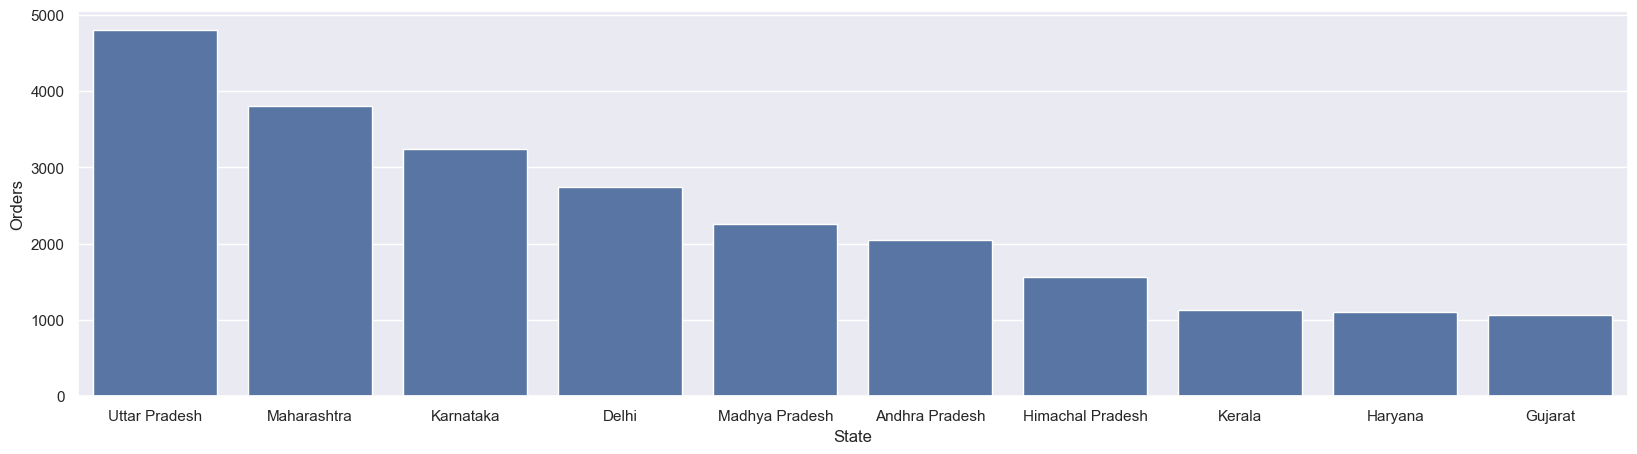

In [22]:
#total number of orders from top 10 states
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(data=sales_state,x='State',y='Orders')


<Axes: xlabel='State', ylabel='Amount'>

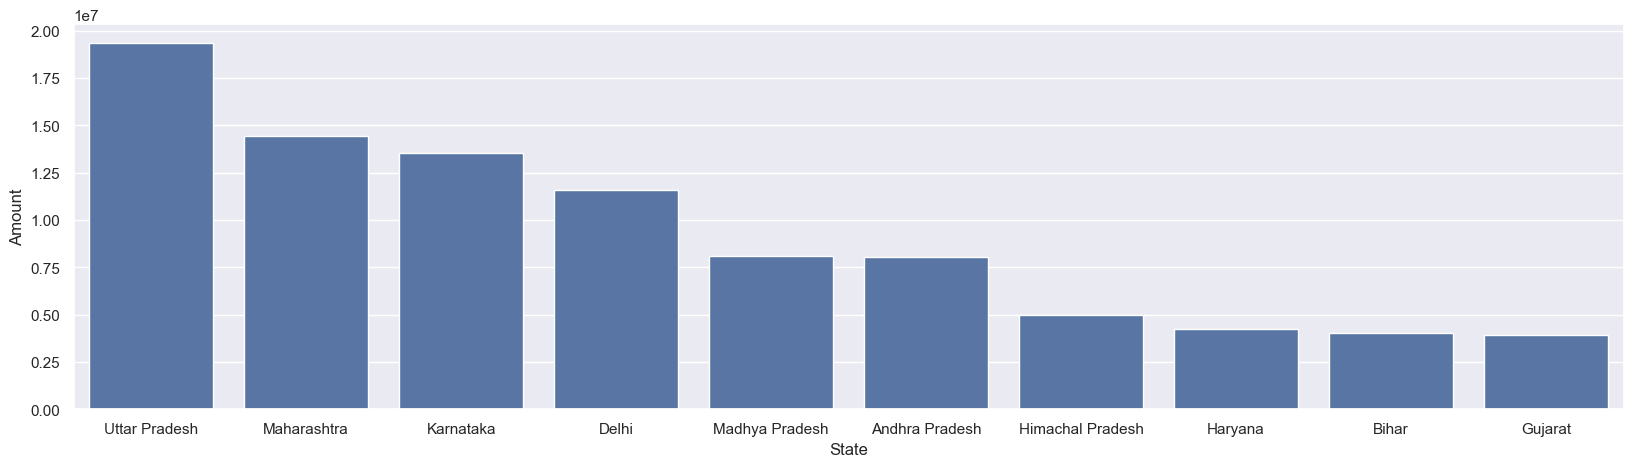

In [23]:
#total number of oamount/sales from top 10 states
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(data=sales_state,x='State',y='Amount')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra, Karnataka respectively*

## MARITAL STATUS

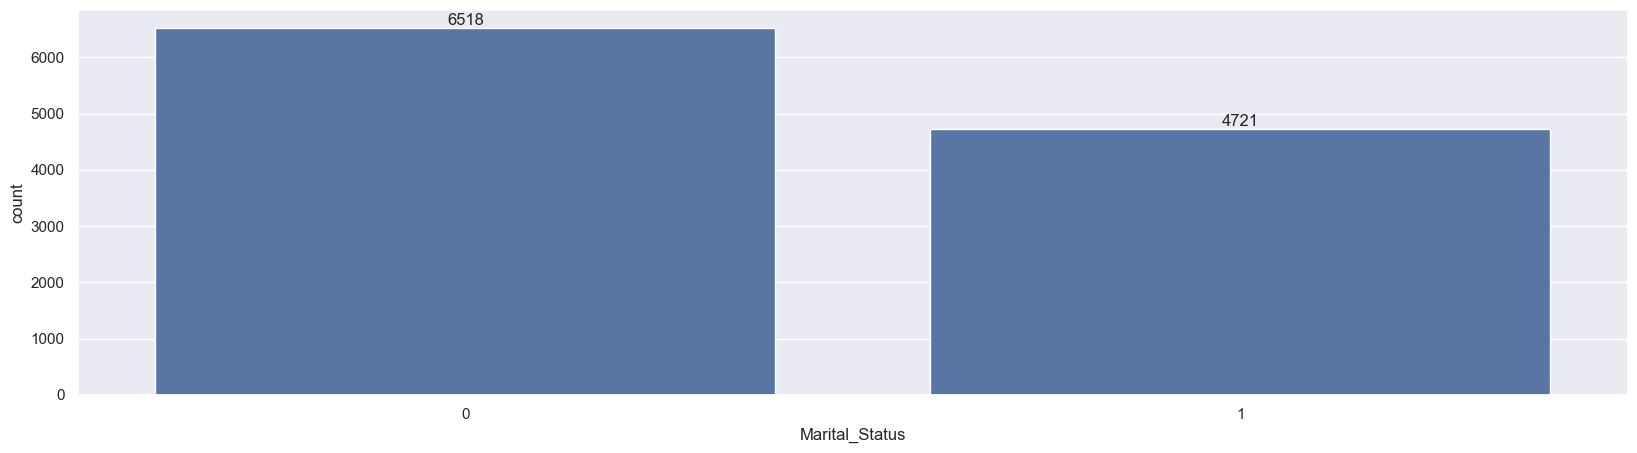

In [24]:
ax=sns.countplot(x='Marital_Status',data=df)

sns.set(rc={'figure.figsize':(5,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

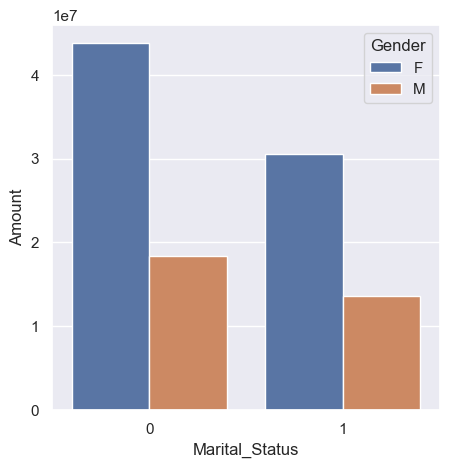

In [25]:
sales_marital_status=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(5,5)})
                             
sns.barplot(data=sales_marital_status,x='Marital_Status',y='Amount',hue='Gender')

*From above buyers we can see that most of the buyers are married(women) and they have high purchasing power*

## OCCUPATION

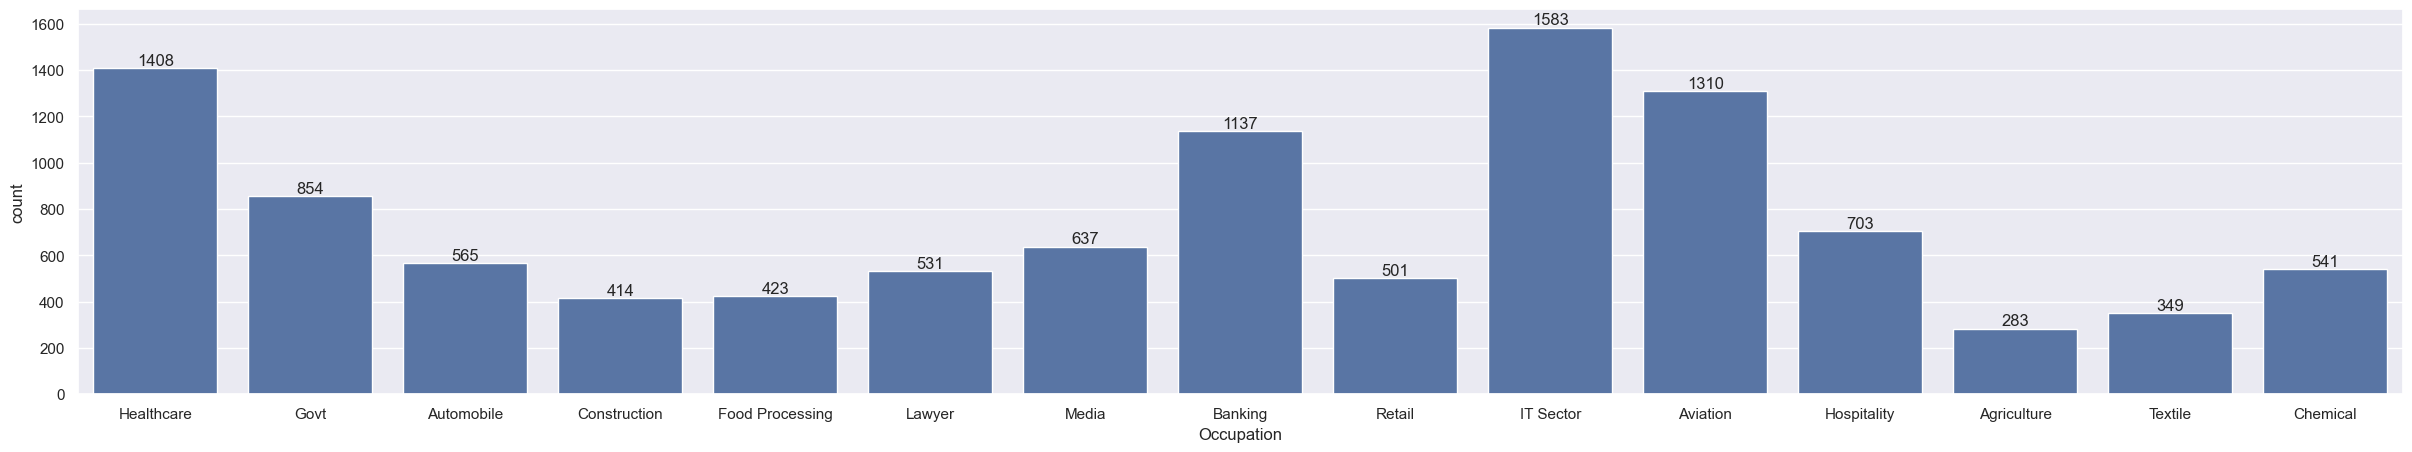

In [27]:
ax=sns.countplot(x='Occupation',data=df)

sns.set(rc={'figure.figsize':(30,10)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

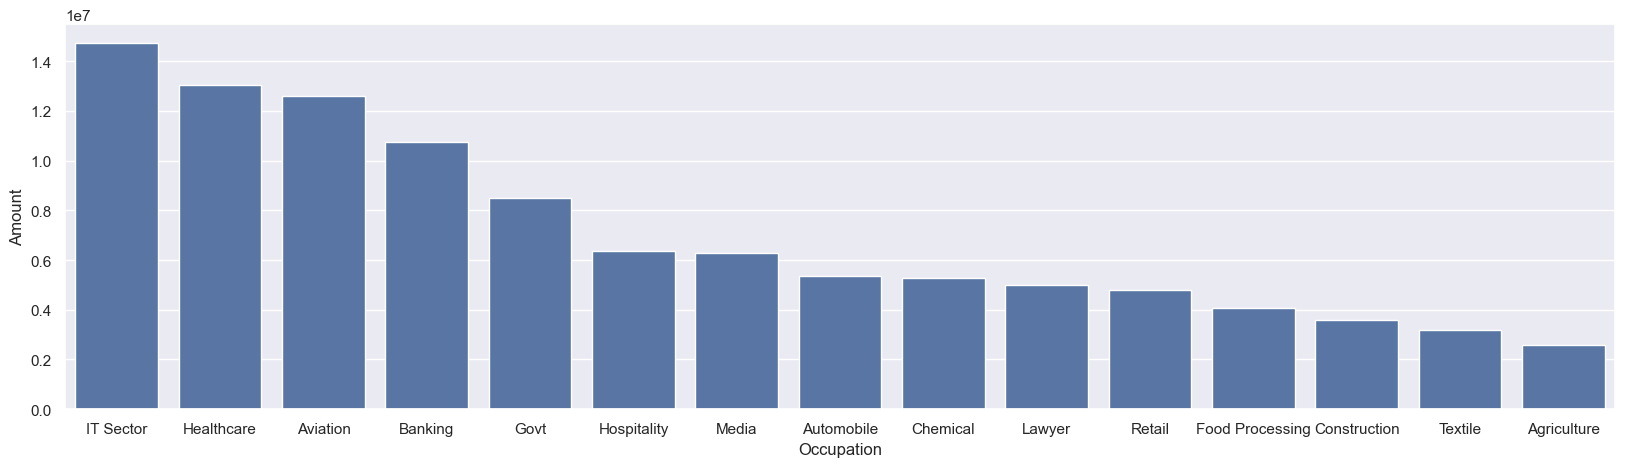

In [28]:
sales_occ=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(data=sales_occ,x='Occupation',y='Amount')

*From above graphs we can see most of the buyers are working in IT, Healthcare and Aviation Sector*

## PRODUCT CATEGORY

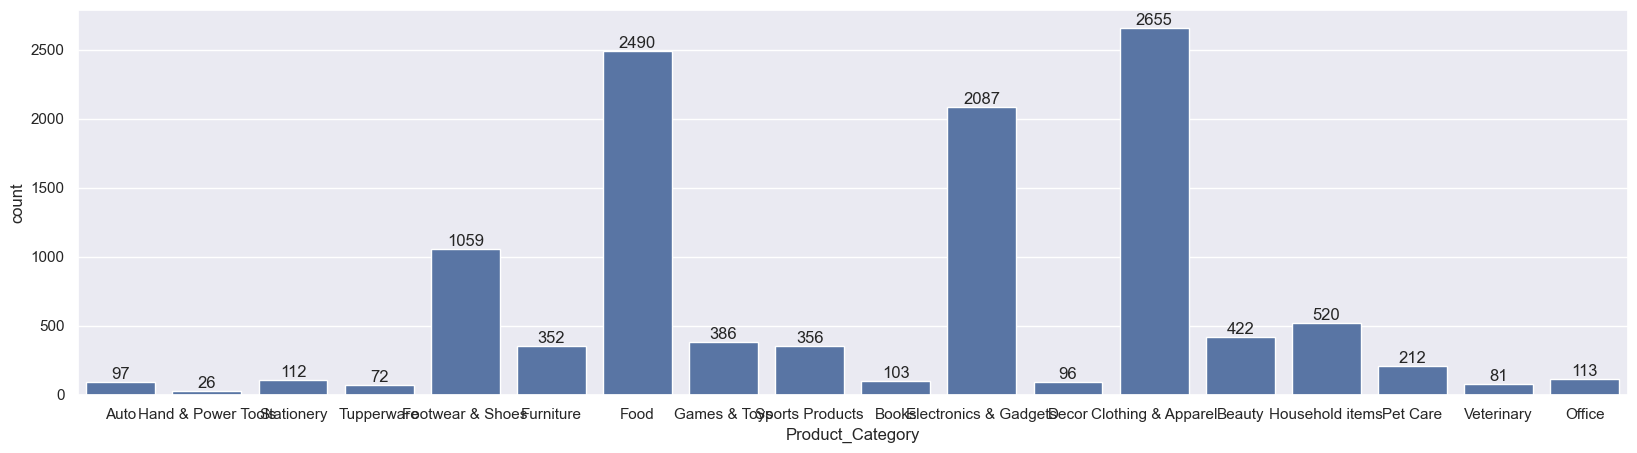

In [29]:
ax=sns.countplot(x='Product_Category',data=df)

sns.set(rc={'figure.figsize':(40,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

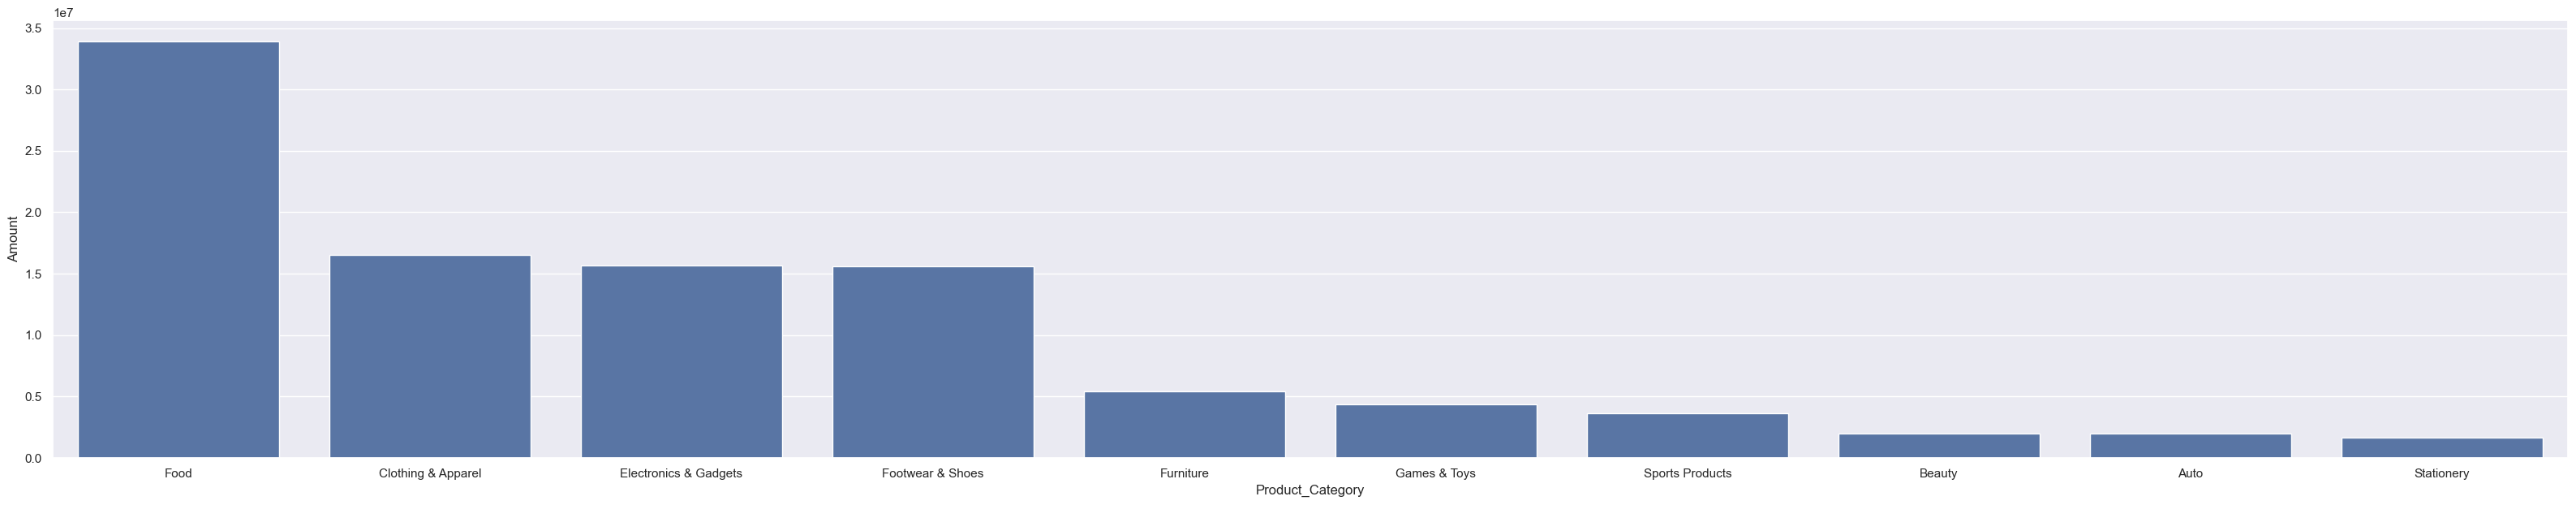

In [30]:
sales_product=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(40,7)})

sns.barplot(data=sales_product,x='Product_Category',y='Amount')

*From above graph we can see that most of the sold products are from Food, clothing and Electronics Category*

<Axes: xlabel='Product_ID', ylabel='Orders'>

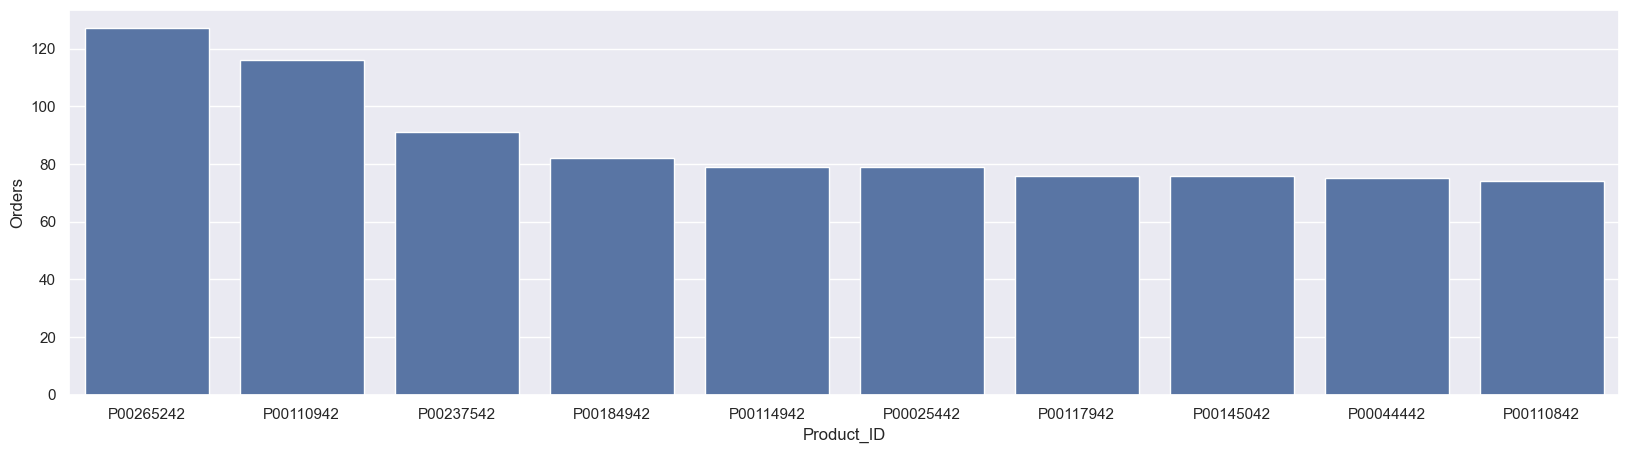

In [31]:
sales_product=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(data=sales_product,x='Product_ID',y='Orders')

<Axes: xlabel='Product_ID'>

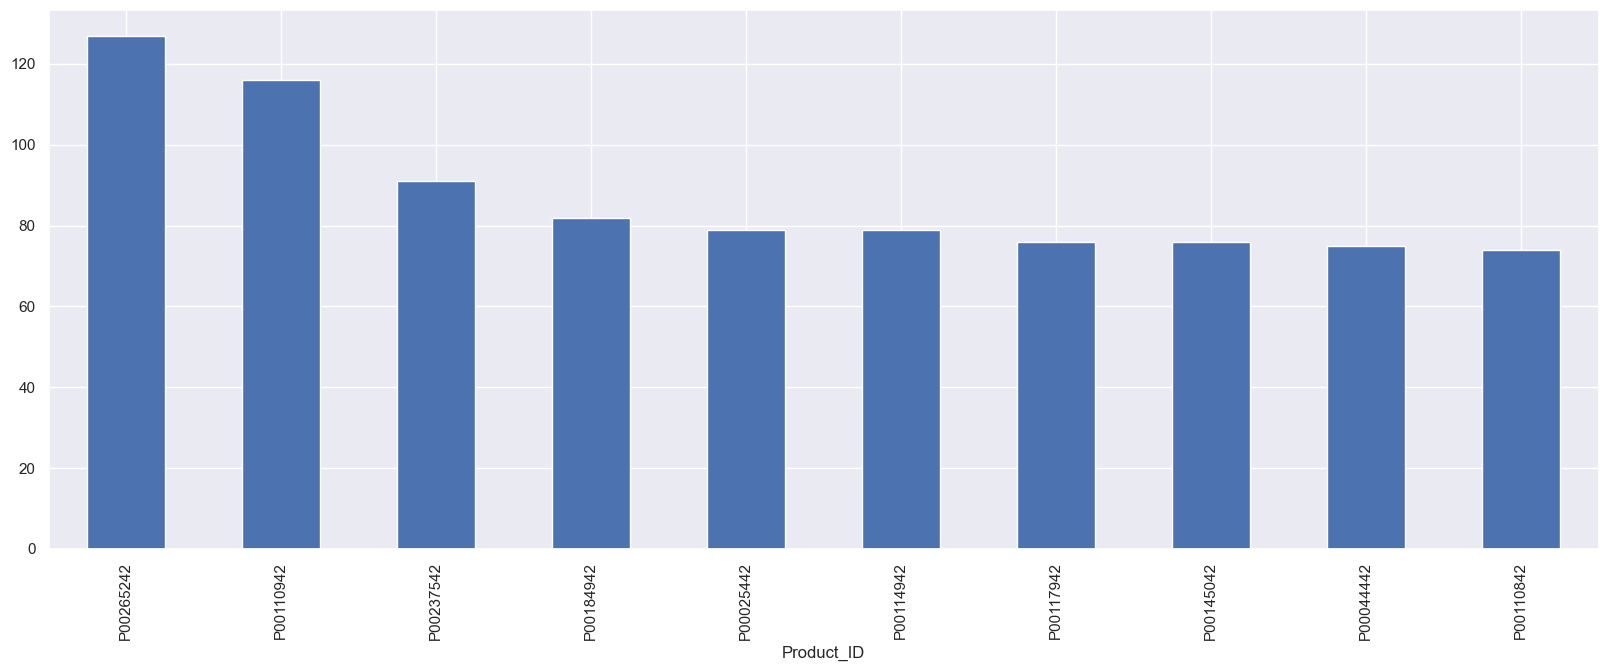

In [33]:
#Top 10 most sold products

fig1,ax1=plt.subplots(figsize=(20,7))

df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Conclusion: 
Individuals in the 26-35 age group who are married and reside in Uttar Pradesh, Maharashtra, and Karnataka, and work in IT, Healthcare, and Aviation sectors, exhibit a higher likelihood of purchasing products from the Food, Clothing, and Electronics categories.
## 
Suggesono:s:
To capitalize on this observed trend, targeted marketing efforts and product promotions can be tailored specifically for the identified demographic. Implementing personalized campaigns and incentives in the Food, Clothing, and Electronics categories during Diwali sales could potentially maximize engagement and drive increased sales from this specific consumer segmet.*